In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.metrics import accuracy_score, confusion_matrix

#Leer DataSet

X = pd.read_csv('DataSet_Celestial_Body.csv')
y = pd.read_csv('Outputs_Celestial_Body.csv')

X = X.iloc[:,1]
y = y.iloc[:,1]

#Leer DataSet_val

X_val = pd.read_csv('DataSet_Celestial_Body_val.csv')
y_val = pd.read_csv('Outputs_Celestial_Body_val.csv')

X_val = X_val.iloc[:,1]
y_val = y_val.iloc[:,1]

#Leer DataSet_test

X_test = pd.read_csv('DataSet_Celestial_Body_test.csv')
y_test = pd.read_csv('Outputs_Celestial_Body_test.csv')

X_test = X_test.iloc[:,1]
y_test = y_test.iloc[:,1]

#Imprimir :V
#print("Dataset - Validationset - Testset")
#print(X)
#print(y)
#print(X_val)
#print(y_val)
#print(X_test)
#print(y_test)

#Convertir a un numpy array
X = np.array(X)
y = np.array(y)

X_val = np.array(X_val)
y_val = np.array(y_val)

X_test = np.array(X_test)
y_test = np.array(y_test)

#Reshape a los Dataset
X = X.reshape((2000*9,3))
y = y.reshape((2000*9,9))

X_val = X_val.reshape((650*9,3))
y_val = y_val.reshape((650*9,9))

X_test = X_test.reshape((650*9,3))
y_test = y_test.reshape((650*9,9))

#Imprimir :V
print("Dataset y Output")
print(X)
print(y)
print("Validationset y ValidationOutput")
print(X_val)
print(y_val)
print("Testset y TestOutput")
print(X_test)
print(y_test)

C:\Users\pay-7\AppData\Local\Temp\ipykernel_10880\4068295007.py:3: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


Dataset y Output
[[-0.37605875  2.83629005 -0.60086577]
 [-0.37605875  2.85115574 -0.5943379 ]
 [-0.37605875  2.81079533 -0.59738269]
 ...
 [-0.37605907 -0.35391733 -0.49788529]
 [-0.37605907 -0.35391524 -0.48937662]
 [-0.37605907 -0.35391683 -0.49573501]]
[[1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]]
Validationset y ValidationOutput
[[-0.37607163  2.84963439 -0.59950737]
 [-0.37607164  2.82805745 -0.59586254]
 [-0.37607164  2.82401021 -0.59399181]
 ...
 [-0.37607195 -0.35391754 -0.49704685]
 [-0.37607195 -0.35391533 -0.48989928]
 [-0.37607195 -0.35391431 -0.48265283]]
[[1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]]
Testset y TestOutput
[[-0.37606738  2.81834218 -0.59463992]
 [-0.37606738  2.84296985 -0.58860669]
 [-0.37606737  2.82124484 -0.60938059]
 ...
 [-0.37606769 -

In [3]:
# Regresion Softmax
def stable_softmax(Z):
    exps = np.exp(Z - np.max(Z))
    return exps / exps.sum(axis=-1,keepdims=True) ##Sumatoria se realiza para cada fila
def grad_softmax_crossentropy(Y_hat, Y):
    """
    Y: Etiquetas de tamaño (m, c) //m: nro ejemplos, c: nro clases
    Y_hat: Predicciones (stable softmax) de tamaño (m, c) //m: nro ejemplos, c: nro clases
    """
    return (Y_hat - Y) / Y.shape[0] ## . /len(Y_hat) es el término (1/m)
def cross_entropy_with_logits(Z: np.ndarray, Y: np.ndarray):
    """
    Z: La predicción de la última capa sin activar (m, c)
    Y: El vector de etiquetas sin one hot encoding (m,). Si es de tamaño (m, c) se extraerá solo
    """
    if len(Y.shape) > 1:
        Y = Y.argmax(axis=-1)
    
    Z_j = Z[range(len(Z)), Y] ## LA PREDICCIÓN SIN ACTIVAR EN LA COLUMNA DEL Y CORRESPONDIENTE
    loss = - Z_j + np.log(np.sum(np.exp(Z),axis=-1)) ## LOG SOFTMAX CON LA SUMATORI PARA CADA FILA
    
    return loss
def predict(theta, x, bias):
    return stable_softmax(x @ theta + bias)

In [4]:
# NeuralNetwork

class Layer:
    def __init__(self):
        # A dummy layer does nothing
        pass
    
    def forward(self, input):
        # A dummy layer just returns whatever it gets as input.
        return input

    def backward(self, input, grad_output):
        num_units = input.shape[1]
        
        d_layer_d_input = np.eye(num_units)
        
        return np.dot(grad_output, d_layer_d_input)
class ReLU(Layer):
    def __init__(self):
        pass
    
    def forward(self, input):
        return np.maximum(0,input)
    
    def backward(self, input, grad_output):
        relu_grad = input > 0
        return grad_output*relu_grad    #dL/dZ[l]
class Dense(Layer):
    def __init__(self, input_units, output_units, learning_rate=0.1, initializer='standard'):
        self.learning_rate = learning_rate
        
        scaler = 0.01 if initializer == 'standard' else np.sqrt(2.0/input_units)
        
        self.weights = np.random.randn(input_units, output_units)*scaler
        self.biases = np.zeros(output_units)
        
    def forward(self,input):
        return input @ self.weights + self.biases #<your code here>
    
    def backward(self,input,grad_output):
        # Calculamos dL/dA[l-1]
        grad_input = grad_output @ self.weights.T #dL/dA[l-1] = <dL/dZ[l], w[l]'> -> dL/dX -> dL/dA[l-1]
        
        # Calculamos para los pesos y los bias
        grad_weights = input.T @ grad_output #dL/dW[l] = <A[l-1]', dL/dZ[l]> -> dL/dθ
        grad_biases = np.sum(grad_output, axis=0) #dL/db[l] = sum_rows(b[l])
        
        assert grad_weights.shape == self.weights.shape and grad_biases.shape == self.biases.shape
        
        # Actualizamos parámetros
        self.weights = self.weights - self.learning_rate * grad_weights
        self.biases = self.biases - self.learning_rate * grad_biases

        return grad_input ## Retornamos grad para la anterior capa

In [5]:
# Entrenamiento

def forward(network, X):
    activations = []
    input = X

    for layer in network:
        input = layer.forward(input)
        activations.append(input)    
        
    assert len(activations) == len(network)
    return activations

def predict(network,X):
    logits = forward(network,X)[-1]
    preds = stable_softmax(logits)
    #return logits.argmax(axis=-1) #Max element of each row
    return preds.argmax(axis=-1)

def train(network,X,y):
    # Obtener activaciones
    layer_activations = forward(network,X)
    layer_inputs = [X]+layer_activations  #layer_input[i] es una entrada para network[i]
    logits = layer_activations[-1] #extraemos la última capa sin activar
    
    # Calculamos el Loss y el gradiente inicial para retropopagar
    loss = cross_entropy_with_logits(logits,y)
    loss_grad = grad_softmax_crossentropy(stable_softmax(logits),y) #dZ[L]
    
    # Retropopagamos
    for layer, input in zip(reversed(network), reversed(layer_inputs[:-1])):
        loss_grad = layer.backward(input, loss_grad)
        
    return np.mean(loss)

from tqdm import trange
from IPython.display import clear_output

def iterate_minibatches(inputs, targets, batchsize, shuffle=False):
    assert len(inputs) == len(targets)
    if shuffle:
        indices = np.random.permutation(len(inputs))
    for start_idx in trange(0, len(inputs) - batchsize + 1, batchsize):
        if shuffle:
            excerpt = indices[start_idx:start_idx + batchsize]
        else:
            excerpt = slice(start_idx, start_idx + batchsize)
            
        yield inputs[excerpt], targets[excerpt]


In [6]:
#Creando NeuralNetwork
print("Building NeuralNetwork")

network = []
network.append(Dense(X.shape[1],18, initializer='xavier'))
network.append(ReLU())
network.append(Dense(18,18, initializer='xavier'))
network.append(ReLU())
network.append(Dense(18,9, initializer='xavier'))

print("Initial Weigths")
network[0].weights

Building NeuralNetwork
Initial Weigths


array([[-0.57315403,  0.23781092,  0.34504423, -0.17316862,  0.73159074,
         0.64516146, -0.26635418, -0.27506819,  0.7982502 ,  0.13623149,
        -0.13294054, -1.75687625,  0.08286285, -1.10113097,  0.8639529 ,
         0.02782044, -0.04430092,  1.08272858],
       [ 1.54139101,  1.11677661, -0.29831396, -0.16800963,  1.11722433,
         1.18352826,  0.18640854,  0.3984224 , -1.43791566,  1.47289492,
         1.09735443,  0.40370259,  0.20524576, -0.13046835, -0.66227973,
        -1.04399041,  0.94205365, -0.9574224 ],
       [-1.1421667 ,  1.73417316,  0.31457224, -0.18930303, -0.34926575,
        -0.10612186,  0.6336102 ,  0.08529548,  0.7704462 ,  0.81248058,
        -1.77171108, -0.02351114, -0.6353637 ,  0.8938275 ,  0.66778013,
        -0.55799153, -0.69326742, -0.19633906]])

In [7]:
#Entrenando NeuralNetwork
print("Training NeuralNetwork")
print("El valor del -loss- es:")
train(network,X,y)

Training NeuralNetwork
El valor del -loss- es:


2.6181408875173346

In [8]:
network[0].weights

array([[-0.57283013,  0.23697913,  0.34911947, -0.16950741,  0.73341629,
         0.64489164, -0.25860824, -0.2704976 ,  0.79814287,  0.13574465,
        -0.14321419, -1.75635101,  0.08168125, -1.09597044,  0.86048968,
         0.02830303, -0.04206715,  1.08940913],
       [ 1.52894882,  1.12002949, -0.29675175, -0.16408326,  1.11446269,
         1.19219851,  0.19688995,  0.39912326, -1.44046747,  1.45308474,
         1.11014156,  0.39789755,  0.20659859, -0.12561018, -0.66091489,
        -1.0415901 ,  0.91924193, -0.95773167],
       [-1.14041304,  1.73309109,  0.30691911, -0.18697663, -0.34937373,
        -0.10837882,  0.61118933,  0.07480215,  0.77665281,  0.82517073,
        -1.76960044, -0.02193419, -0.63528162,  0.88683298,  0.66904961,
        -0.55469812, -0.68857152, -0.19859501]])

Epoch 9
Train accuracy: 0.9575
Val accuracy: 0.9538461538461539


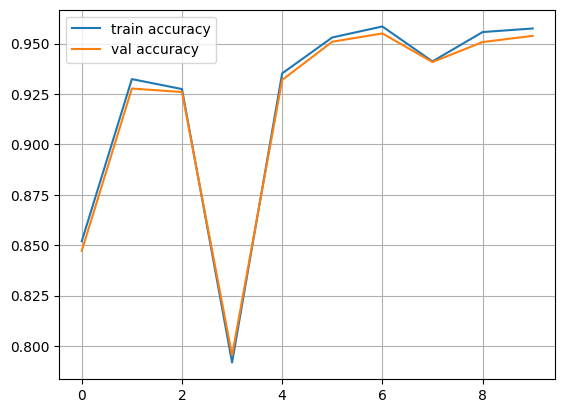

In [9]:
from IPython.display import clear_output
train_log = []
val_log = []

for epoch in range(10):

    for x_batch,y_batch in iterate_minibatches(X,y,batchsize=32,shuffle=True):
        train(network,x_batch,y_batch)
    
    args_y_train = np.argmax(y, axis=-1)
    args_y_val = np.argmax(y_val, axis=-1)
    train_log.append(np.mean(predict(network,X)==args_y_train))
    val_log.append(np.mean(predict(network,X_val)==args_y_val))
    
    clear_output()
    print("Epoch",epoch)
    print("Train accuracy:",train_log[-1])
    print("Val accuracy:",val_log[-1])
    plt.plot(train_log,label='train accuracy')
    plt.plot(val_log,label='val accuracy')
    plt.legend(loc='best')
    plt.grid()
    plt.show()

In [10]:
#Porcentaje de aciertos Testset y COnfucionMatrix
print("Porcentaje de aciertos en TestSet")
accuracy_score(predict(network, X_test), np.argmax(y_test, axis=-1))

print("Matris de confucion")
confusion_matrix(predict(network, X_test), np.argmax(y_test, axis=-1))

Porcentaje de aciertos en TestSet
Matris de confucion


array([[650,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0, 650,   0, 250,   0,   0,   0,   0,   0],
       [  0,   0, 650,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0, 400,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0, 650,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0, 650,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0, 650,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0, 650,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0, 650]], dtype=int64)